In [1]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
# !pip -q install torch-spline-conv==latest+cu102 torch-scatter==latest+cu102 torch-cluster==latest+cu102 torch-sparse==latest+cu102  -f https://pytorch-geometric.com/whl/torch-1.6.0.html

# !pip install -q git+https://github.com/elmahyai/pytorch_geometric_temporal   # remove after merging

2.3.1+cu121
12.1


In [2]:
# version should match with torch and cuda
%%bash
pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
pip install torch-sparse -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
pip install torch-cluster -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 33.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.9 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.1/947.1 kB 15.1 MB/s eta 0:00:00


In [3]:
!pip install torch_geometric==2.2.0
!pip install torch_geometric_temporal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773275 sha256=6dd71c1dcb2f5c1482e948025b205ea7cf1293a991f9440f2bf1e21bb04f6f8a
  Stored in directory: /root/.cache/pip/wheels/c8/e4/83/5e964867e23f8a61cb8c5d5b9477617b710e96e6ebf1844562
Successfully built torch_geometric
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_

In [4]:
import os
from time import time
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx



import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:0')
print("CUDA:", USE_CUDA, DEVICE)

# from tensorboardX import SummaryWriter
# sw = SummaryWriter(logdir='.', flush_secs=5)

from torch.utils.tensorboard import SummaryWriter
# 創建一個 SummaryWriter
sw = SummaryWriter(log_dir='logs')

import math
from typing import Optional, List, Union

import torch
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.typing import OptTensor
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.transforms import LaplacianLambdaMax
from torch_geometric.utils import remove_self_loops, add_self_loops, get_laplacian
from torch_geometric.utils import to_dense_adj

CUDA: True cuda:0


# Loading data  ( The temporal part)




In [5]:
# def load_graphdata_channel1(graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size,
#                             shuffle=True, DEVICE = torch.device('cuda:0')):
#     '''
#     :param graph_signal_matrix_filename: str
#     :param num_of_hours: int
#     :param num_of_days: int
#     :param num_of_weeks: int
#     :param DEVICE:
#     :param batch_size: int
#     :return:
#     three DataLoaders, each dataloader contains:
#     test_x_tensor: (B, N_nodes, in_feature, T_input)
#     test_decoder_input_tensor: (B, N_nodes, T_output)
#     test_target_tensor: (B, N_nodes, T_output)
#     '''

#     file = os.path.basename(graph_signal_matrix_filename).split('.')[0]
#     #filename = os.path.join('/content/drive/MyDrive/Dissertation/DissertationData/Test/', file + '_r' + str(num_of_hours) + '_d' + str(num_of_days) + '_w' + str(num_of_weeks)) +'_astcgn'

#     filename = os.path.join('/content/drive/MyDrive/Dissertation/DissertationData', file)
#     print('load file:', filename)

#     file_data = np.load(filename + '.npz')
#     train_x = file_data['train_x']  # (10181, 307, 3, 12)
#     train_x = train_x[:, :, 0:1, :]
#     train_target = file_data['train_target']  # (10181, 307, 12)

#     val_x = file_data['val_x']
#     val_x = val_x[:, :, 0:1, :]
#     val_target = file_data['val_target']

#     test_x = file_data['test_x']
#     test_x = test_x[:, :, 0:1, :]
#     test_target = file_data['test_target']

#     mean = file_data['mean'][:, :, 0:1, :]  # (1, 1, 3, 1)
#     std = file_data['std'][:, :, 0:1, :]  # (1, 1, 3, 1)

#     # ------- train_loader -------
#     train_x_tensor = torch.from_numpy(train_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     train_target_tensor = torch.from_numpy(train_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_target_tensor)
#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

#     # ------- val_loader -------
#     val_x_tensor = torch.from_numpy(val_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     val_target_tensor = torch.from_numpy(val_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     val_dataset = torch.utils.data.TensorDataset(val_x_tensor, val_target_tensor)
#     val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#     # ------- test_loader -------
#     test_x_tensor = torch.from_numpy(test_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     test_target_tensor = torch.from_numpy(test_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_target_tensor)
#     test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # print
#     print('train:', train_x_tensor.size(), train_target_tensor.size())
#     print('val:', val_x_tensor.size(), val_target_tensor.size())
#     print('test:', test_x_tensor.size(), test_target_tensor.size())

#     return train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor, mean, std


# 在 load_graphdata_channel1 函數內加入以下內容
# def load_graphdata_channel1(graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size,
#                             shuffle=True, DEVICE = torch.device('cuda:0')):
#     # ... 之前的代碼 ...

#     # 將數據加載為 NumPy 數組
#     file = os.path.basename(graph_signal_matrix_filename).split('.')[0]
#     filename = os.path.join('/content/drive/MyDrive/Dissertation/DissertationData', file)
#     print('load file:', filename)
#     file_data = np.load(filename + '.npz')
#     train_x = file_data['train_x']  # (10181, 307, 3, 12)
#     train_x = train_x[:, :, 0:1, :]
#     train_target = file_data['train_target']  # (10181, 307, 12)

#     val_x = file_data['val_x']
#     val_x = val_x[:, :, 0:1, :]
#     val_target = file_data['val_target']

#     test_x = file_data['test_x']
#     test_x = test_x[:, :, 0:1, :]
#     test_target = file_data['test_target']

#     # 計算均值和標準差
#     mean = train_x.mean(axis=(0, 1, 2, 3), keepdims=True)
#     std = train_x.std(axis=(0, 1, 2, 3), keepdims=True)

#     # 標準化數據
#     train_x = (train_x - mean) / std
#     val_x = (val_x - mean) / std
#     test_x = (test_x - mean) / std

#     # 如果需要，對目標數據也可以進行標準化處理，通常這視具體問題而定
#     # train_target = (train_target - mean_target) / std_target

#     # ------- train_loader -------
#     train_x_tensor = torch.from_numpy(train_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     train_target_tensor = torch.from_numpy(train_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_target_tensor)
#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

#     # ------- val_loader -------
#     val_x_tensor = torch.from_numpy(val_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     val_target_tensor = torch.from_numpy(val_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     val_dataset = torch.utils.data.TensorDataset(val_x_tensor, val_target_tensor)
#     val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#     # ------- test_loader -------
#     test_x_tensor = torch.from_numpy(test_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     test_target_tensor = torch.from_numpy(test_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_target_tensor)
#     test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # print
#     print('train:', train_x_tensor.size(), train_target_tensor.size())
#     print('val:', val_x_tensor.size(), val_target_tensor.size())
#     print('test:', test_x_tensor.size(), test_target_tensor.size())

#     return train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor, mean, std



In [105]:
# NORMALISATION
def load_graphdata_channel1(graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size,
                            shuffle=True, DEVICE=torch.device('cuda:0')):
    # 將數據加載為 NumPy 數組
    file = os.path.basename(graph_signal_matrix_filename).split('.')[0]
    filename = os.path.join('/content/drive/MyDrive/Dissertation/DissertationData', file)
    print('load file:', filename)
    file_data = np.load(filename + '.npz')
    train_x = file_data['train_x']  # (10181, 307, 3, 12)
    train_x = train_x[:, :, 0:1, :]
    train_target = file_data['train_target']  # (10181, 307, 12)

    val_x = file_data['val_x']
    val_x = val_x[:, :, 0:1, :]
    val_target = file_data['val_target']

    test_x = file_data['test_x']
    test_x = test_x[:, :, 0:1, :]
    test_target = file_data['test_target']

    # 計算數據的最小值和最大值（用於歸一化）
    min_x = train_x.min(axis=(0, 1, 2, 3), keepdims=True)
    max_x = train_x.max(axis=(0, 1, 2, 3), keepdims=True)

    # 將數據歸一化到 [0, 1] 範圍
    train_x = (train_x - min_x) / (max_x - min_x)
    val_x = (val_x - min_x) / (max_x - min_x)
    test_x = (test_x - min_x) / (max_x - min_x)

    # 將目標數據進行歸一化，使其範圍位於 [0, 1] 之間
    min_target = train_target.min(axis=(0, 1, 2), keepdims=True)
    max_target = train_target.max(axis=(0, 1, 2), keepdims=True)

    train_target = (train_target - min_target) / (max_target - min_target)
    val_target = (val_target - min_target) / (max_target - min_target)
    test_target = (test_target - min_target) / (max_target - min_target)

    # ------- train_loader -------
    train_x_tensor = torch.from_numpy(train_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
    train_target_tensor = torch.from_numpy(train_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
    train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_target_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

    # ------- val_loader -------
    val_x_tensor = torch.from_numpy(val_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
    val_target_tensor = torch.from_numpy(val_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
    val_dataset = torch.utils.data.TensorDataset(val_x_tensor, val_target_tensor)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # ------- test_loader -------
    test_x_tensor = torch.from_numpy(test_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
    test_target_tensor = torch.from_numpy(test_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
    test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_target_tensor)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # print
    print('train:', train_x_tensor.size(), train_target_tensor.size())
    print('val:', val_x_tensor.size(), val_target_tensor.size())
    print('test:', test_x_tensor.size(), test_target_tensor.size())

    return train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor, min_x, max_x, min_target, max_target


In [87]:
# from sklearn.preprocessing import RobustScaler

# def load_graphdata_channel1(graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size,
#                             shuffle=True, DEVICE=torch.device('cuda:0')):
#     # ... 之前的代碼 ...

#     # 將數據加載為 NumPy 數組
#     file = os.path.basename(graph_signal_matrix_filename).split('.')[0]
#     filename = os.path.join('/content/drive/MyDrive/Dissertation/DissertationData', file)
#     print('load file:', filename)
#     file_data = np.load(filename + '.npz')
#     train_x = file_data['train_x']  # (10181, 307, 3, 12)
#     train_x = train_x[:, :, 0:1, :]
#     train_target = file_data['train_target']  # (10181, 307, 12)

#     val_x = file_data['val_x']
#     val_x = val_x[:, :, 0:1, :]
#     val_target = file_data['val_target']

#     test_x = file_data['test_x']
#     test_x = test_x[:, :, 0:1, :]
#     test_target = file_data['test_target']

#     # 初始化 RobustScaler
#     scaler_x = RobustScaler()
#     scaler_target = RobustScaler()

#     # Reshape 後進行縮放，然後再 reshape 回來
#     train_x_shape = train_x.shape
#     val_x_shape = val_x.shape
#     test_x_shape = test_x.shape

#     train_x = scaler_x.fit_transform(train_x.reshape(-1, train_x_shape[-1])).reshape(train_x_shape)
#     val_x = scaler_x.transform(val_x.reshape(-1, val_x_shape[-1])).reshape(val_x_shape)
#     test_x = scaler_x.transform(test_x.reshape(-1, test_x_shape[-1])).reshape(test_x_shape)

#     train_target_shape = train_target.shape
#     val_target_shape = val_target.shape
#     test_target_shape = test_target.shape

#     train_target = scaler_target.fit_transform(train_target.reshape(-1, train_target_shape[-1])).reshape(train_target_shape)
#     val_target = scaler_target.transform(val_target.reshape(-1, val_target_shape[-1])).reshape(val_target_shape)
#     test_target = scaler_target.transform(test_target.reshape(-1, test_target_shape[-1])).reshape(test_target_shape)

#     # ------- train_loader -------
#     train_x_tensor = torch.from_numpy(train_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     train_target_tensor = torch.from_numpy(train_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_target_tensor)
#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

#     # ------- val_loader -------
#     val_x_tensor = torch.from_numpy(val_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     val_target_tensor = torch.from_numpy(val_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     val_dataset = torch.utils.data.TensorDataset(val_x_tensor, val_target_tensor)
#     val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#     # ------- test_loader -------
#     test_x_tensor = torch.from_numpy(test_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
#     test_target_tensor = torch.from_numpy(test_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)
#     test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_target_tensor)
#     test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # print
#     print('train:', train_x_tensor.size(), train_target_tensor.size())
#     print('val:', val_x_tensor.size(), val_target_tensor.size())
#     print('test:', test_x_tensor.size(), test_target_tensor.size())

#     return train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
graph_signal_matrix_filename = 'gcn_data_Aug13_astcgn.npz' #讀入資料的function也要順便改路徑
batch_size = 4 #跑不動，被我降低
num_of_weeks = 0
num_of_days = 0
num_of_hours = 1 #一格時間步

# train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor, _mean, _std = load_graphdata_channel1(
#     graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size)

#Normalisation
train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor, _mean, _std, _min_target, _max_target = load_graphdata_channel1(
    graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size)

# train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor = load_graphdata_channel1(
#     graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, batch_size)


load file: /content/drive/MyDrive/Dissertation/DissertationData/gcn_data_Aug13_astcgn
train: torch.Size([217, 5650, 1, 1]) torch.Size([217, 5650, 1])
val: torch.Size([73, 5650, 1, 1]) torch.Size([73, 5650, 1])
test: torch.Size([73, 5650, 1, 1]) torch.Size([73, 5650, 1])


In [107]:
def check_normalization(train_loader, val_loader, test_loader):
    # 從訓練數據中取出一個 batch 進行檢查
    train_batch = next(iter(train_loader))[0]  # 只取特徵張量
    val_batch = next(iter(val_loader))[0]
    test_batch = next(iter(test_loader))[0]

    # 檢查訓練數據的範圍
    train_min, train_max = train_batch.min().item(), train_batch.max().item()
    train_mean, train_std = train_batch.mean().item(), train_batch.std().item()
    print(f"Train data range: Min = {train_min}, Max = {train_max}")
    print(f"Train data: Mean = {train_mean}, Std = {train_std}")

    # 檢查驗證數據的範圍
    val_min, val_max = val_batch.min().item(), val_batch.max().item()
    val_mean, val_std = val_batch.mean().item(), val_batch.std().item()
    print(f"Validation data range: Min = {val_min}, Max = {val_max}")
    print(f"Validation data: Mean = {val_mean}, Std = {val_std}")

    # 檢查測試數據的範圍
    test_min, test_max = test_batch.min().item(), test_batch.max().item()
    test_mean, test_std = test_batch.mean().item(), test_batch.std().item()
    print(f"Test data range: Min = {test_min}, Max = {test_max}")
    print(f"Test data: Mean = {test_mean}, Std = {test_std}")

# 假設 train_loader, val_loader, test_loader 已經加載完畢
check_normalization(train_loader, val_loader, test_loader)


Train data range: Min = 0.0, Max = 0.20542635023593903
Train data: Mean = 0.002699286676943302, Std = 0.008287587203085423
Validation data range: Min = 0.0, Max = 0.3449612259864807
Validation data: Mean = 0.002540474757552147, Std = 0.00866266991943121
Test data range: Min = 0.0, Max = 0.27131783962249756
Test data: Mean = 0.002595355501398444, Std = 0.008104189299046993


# Loading the graph ( The spatial part)

In [108]:
def get_adjacency_matrix(distance_df_filename, num_of_vertices, id_filename=None):
    '''
    Parameters
    ----------
    distance_df_filename: str, path of the csv file contains edges information
    num_of_vertices: int, the number of vertices
    Returns
    ----------
    A: np.ndarray, adjacency matrix
    '''
    if 'npy' in distance_df_filename:  # false
        adj_mx = np.load(distance_df_filename)
        return adj_mx, None
    else:

        #--------------------------------------------- read from here
        import csv
        A = np.zeros((int(num_of_vertices), int(num_of_vertices)),dtype=np.float32)
        distaneA = np.zeros((int(num_of_vertices), int(num_of_vertices)), dtype=np.float32)

        #------------ Ignore
        if id_filename: # false
            with open(id_filename, 'r') as f:
                id_dict = {int(i): idx for idx, i in enumerate(f.read().strip().split('\n'))}  # 把节点id（idx）映射成从0开始的索引

            with open(distance_df_filename, 'r') as f:
                f.readline()
                reader = csv.reader(f)
                for row in reader:
                    if len(row) != 3:
                        continue
                    i, j, distance = int(row[0]), int(row[1]), float(row[2])
                    A[id_dict[i], id_dict[j]] = 1
                    distaneA[id_dict[i], id_dict[j]] = distance
            return A, distaneA

        else:
         #-------------Continue reading
            with open(distance_df_filename, 'r') as f:
                f.readline()
                reader = csv.reader(f)
                for row in reader:
                    if len(row) != 3:
                        continue
                    i, j, distance = int(row[0]), int(row[1]), float(row[2])
                    A[i, j] = 1
                    distaneA[i, j] = distance
            return A, distaneA

Non-zero elements in adj_mx: 309136


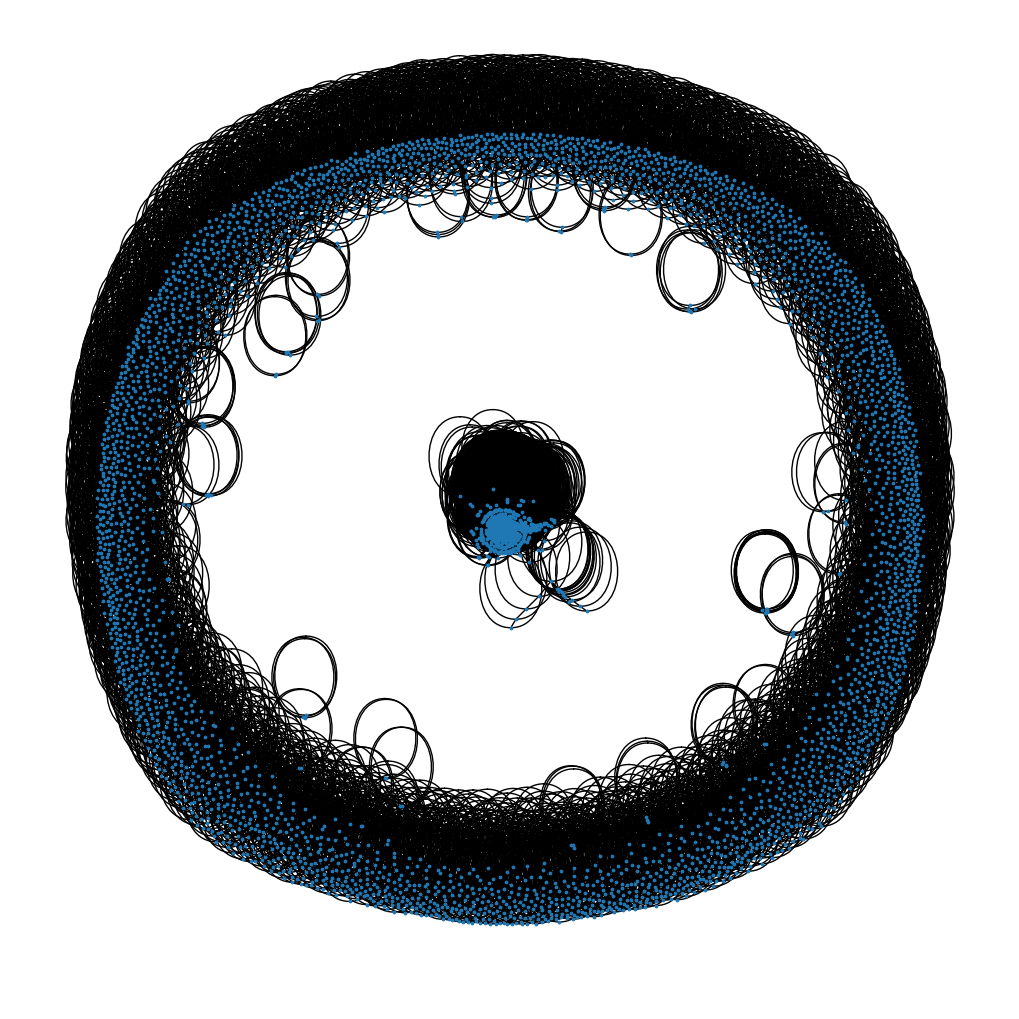

In [34]:
# 加載矩陣
matrix_filename = '/content/drive/MyDrive/Dissertation/DissertationData/adjacency_matrix.npy'
adj_mx = np.load(matrix_filename)

# 檢查非零元素
non_zero_elements = np.count_nonzero(adj_mx)
print(f"Non-zero elements in adj_mx: {non_zero_elements}")

if non_zero_elements > 0:
    # 繪製圖形
    rows, cols = np.where(adj_mx > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)

    plt.figure(figsize=(10, 10))  # 調整繪圖大小
    nx.draw(gr, node_size=3)
    plt.show()
else:
    print("The adjacency matrix contains no edges, and therefore no graph can be drawn.")

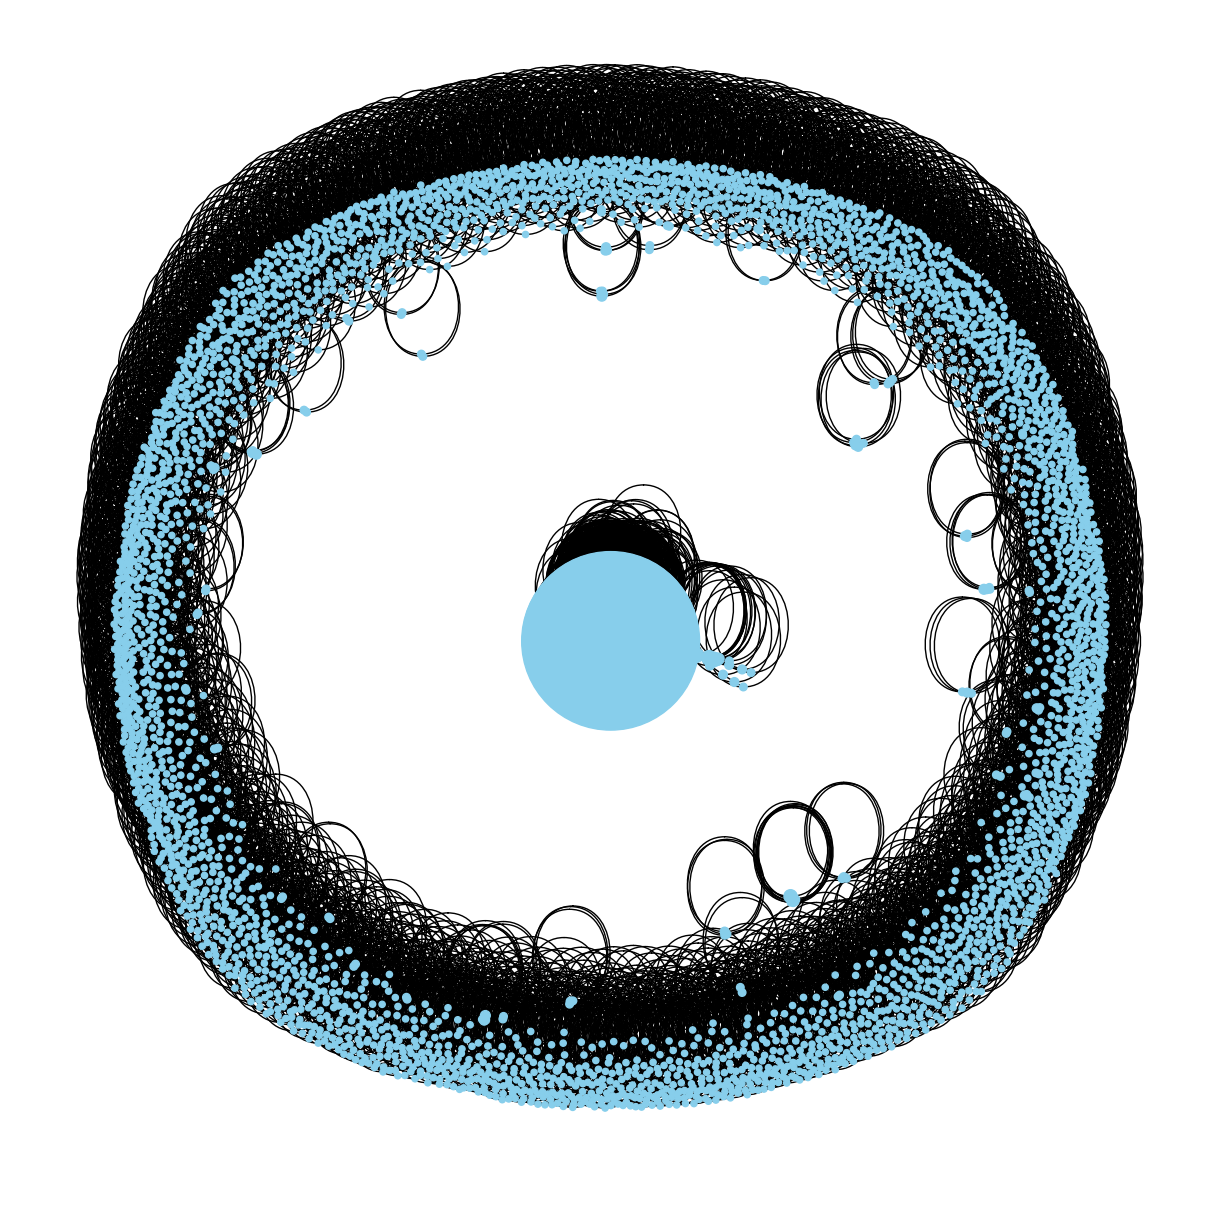

Top 5 nodes by Betweenness Centrality:
[(3735, 0.015358637690401909), (3543, 0.011337925065269913), (2978, 0.008657824079700921), (3170, 0.007168526994865906), (345, 0.005445753470525713)]
Top 5 nodes by Closeness Centrality:
[(3735, 0.28782637622202983), (3543, 0.2794243439378365), (2978, 0.27212474524871894), (3170, 0.2700498329708027), (345, 0.2606110051075848)]
Top 5 nodes by Eigenvector Centrality:
[(3735, 0.06694602809710865), (3543, 0.06687616149367041), (2978, 0.0667266791425581), (3170, 0.06670849860563656), (345, 0.06642944210356828)]


In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# 計算節點度數
degree_dict = dict(gr.degree())
nx.set_node_attributes(gr, degree_dict, 'degree')

# 繪製節點度數作為節點大小
plt.figure(figsize=(12, 12))
nx.draw(gr, node_size=[v * 10 for v in degree_dict.values()], node_color='skyblue', with_labels=False)
plt.show()

# 計算中心性指標
betweenness = nx.betweenness_centrality(gr)
closeness = nx.closeness_centrality(gr)
eigenvector = nx.eigenvector_centrality(gr)

# 打印一些指標
print("Top 5 nodes by Betweenness Centrality:")
print(sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5])

print("Top 5 nodes by Closeness Centrality:")
print(sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5])

print("Top 5 nodes by Eigenvector Centrality:")
print(sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5])


# Making the model

# Model Layers

In [22]:
from torch_geometric_temporal.nn.attention import ASTGCN   # For information about the architecture check the source code

# Initialized the ASTGCN model


In [122]:
# nb_block = 2
# in_channels = 1
# K = 3
# nb_chev_filter = 64
# nb_time_filter = 64
# time_strides = num_of_hours #???? 不可以改？
# num_for_predict = 12
# len_input = 24 #改

nb_block = 2
in_channels = 1
K = 3
nb_chev_filter = 64
nb_time_filter = 64
time_strides = 1  # 我的時間步數
num_for_predict = 1  # 我的時間步數
len_input = 1  # 我的時間步數
num_of_vertices = 5650  # 節點數
#L_tilde = scaled_Laplacian(adj_mx)
#cheb_polynomials = [torch.from_numpy(i).type(torch.FloatTensor).to(DEVICE) for i in cheb_polynomial(L_tilde, K)]
net = ASTGCN( nb_block, in_channels, K, nb_chev_filter, nb_time_filter, time_strides, num_for_predict, len_input, num_of_vertices).to(DEVICE)

# # 將模型轉換為半精度
# net = net.half()

print(net)


ASTGCN(
  (_blocklist): ModuleList(
    (0): ASTGCNBlock(
      (_temporal_attention): TemporalAttention()
      (_spatial_attention): SpatialAttention()
      (_chebconv_attention): ChebConvAttention(1, 64, K=3, normalization=None)
      (_time_convolution): Conv2d(64, 64, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
      (_residual_convolution): Conv2d(1, 64, kernel_size=(1, 1), stride=(1, 1))
      (_layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (1): ASTGCNBlock(
      (_temporal_attention): TemporalAttention()
      (_spatial_attention): SpatialAttention()
      (_chebconv_attention): ChebConvAttention(64, 64, K=3, normalization=None)
      (_time_convolution): Conv2d(64, 64, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
      (_residual_convolution): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (_layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
  )
  (_final_conv): Conv2d(1, 1, kernel_size=(1, 64), stride=

In [123]:
#------------------------------------------------------
#learning_rate = 0.001 #被我降低了
learning_rate = 1e-7
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

print('Net\'s state_dict:')
total_param = 0
for param_tensor in net.state_dict():
    print(param_tensor, '\t', net.state_dict()[param_tensor].size(), '\t', net.state_dict()[param_tensor].device)
    total_param += np.prod(net.state_dict()[param_tensor].size())
print('Net\'s total params:', total_param)
#--------------------------------------------------
print('Optimizer\'s state_dict:')
for var_name in optimizer.state_dict():
    print(var_name, '\t', optimizer.state_dict()[var_name])


Net's state_dict:
_blocklist.0._temporal_attention._U1 	 torch.Size([5650]) 	 cuda:0
_blocklist.0._temporal_attention._U2 	 torch.Size([1, 5650]) 	 cuda:0
_blocklist.0._temporal_attention._U3 	 torch.Size([1]) 	 cuda:0
_blocklist.0._temporal_attention._be 	 torch.Size([1, 1, 1]) 	 cuda:0
_blocklist.0._temporal_attention._Ve 	 torch.Size([1, 1]) 	 cuda:0
_blocklist.0._spatial_attention._W1 	 torch.Size([1]) 	 cuda:0
_blocklist.0._spatial_attention._W2 	 torch.Size([1, 1]) 	 cuda:0
_blocklist.0._spatial_attention._W3 	 torch.Size([1]) 	 cuda:0
_blocklist.0._spatial_attention._bs 	 torch.Size([1, 5650, 5650]) 	 cuda:0
_blocklist.0._spatial_attention._Vs 	 torch.Size([5650, 5650]) 	 cuda:0
_blocklist.0._chebconv_attention._weight 	 torch.Size([3, 1, 64]) 	 cuda:0
_blocklist.0._chebconv_attention._bias 	 torch.Size([64]) 	 cuda:0
_blocklist.0._time_convolution.weight 	 torch.Size([64, 64, 1, 3]) 	 cuda:0
_blocklist.0._time_convolution.bias 	 torch.Size([64]) 	 cuda:0
_blocklist.0._residual_

In [124]:
# 檢查 train_target_tensor 是否包含 NaN 值
if torch.isnan(train_target_tensor).any():
    print("Warning: Train target data contains NaN values!")

In [125]:
# 檢查極端值
print("Train Target Data statistics:")
print(f"Mean: {torch.mean(train_target_tensor)}, Std: {torch.std(train_target_tensor)}")
print(f"Min: {torch.min(train_target_tensor)}, Max: {torch.max(train_target_tensor)}")

Train Target Data statistics:
Mean: 0.0026900246739387512, Std: 0.008524571545422077
Min: 0.0, Max: 1.0


# Defining the loss function

 1. masked_mae

In [126]:
def masked_mae(preds, labels, null_val=np.nan):
    if np.isnan(null_val):
        mask = ~torch.isnan(labels)
    else:
        mask = (labels != null_val)
    mask = mask.float()
    mask /= torch.mean((mask))
    mask = torch.where(torch.isnan(mask), torch.zeros_like(mask), mask)
    loss = torch.abs(preds - labels)
    loss = loss * mask
    loss = torch.where(torch.isnan(loss), torch.zeros_like(loss), loss)
    return torch.mean(loss)


In [127]:
masked_flag=0
criterion = nn.L1Loss().to(DEVICE)
criterion_masked = masked_mae
loss_function = 'mse'

metric_method = 'unmask'
missing_value=0.0


if loss_function=='masked_mse':
    criterion_masked = masked_mse         #nn.MSELoss().to(DEVICE)
    masked_flag=1
elif loss_function=='masked_mae':
    criterion_masked = masked_mae
    masked_flag = 1
elif loss_function == 'mae':
    criterion = nn.L1Loss().to(DEVICE)
    masked_flag = 0
elif loss_function == 'rmse':
    criterion = nn.MSELoss().to(DEVICE)
    masked_flag= 0

In [128]:
def compute_val_loss_mstgcn(net, val_loader, criterion,  masked_flag,missing_value,sw, epoch, edge_index_data, limit=None):
    '''
    for rnn, compute mean loss on validation set
    :param net: model
    :param val_loader: torch.utils.data.utils.DataLoader
    :param criterion: torch.nn.MSELoss
    :param sw: tensorboardX.SummaryWriter
    :param global_step: int, current global_step
    :param limit: int,
    :return: val_loss
    '''
    net.train(False)  # ensure dropout layers are in evaluation mode
    with torch.no_grad():
        val_loader_length = len(val_loader)  # nb of batch
        tmp = []  # batch loss
        for batch_index, batch_data in enumerate(val_loader):
            encoder_inputs, labels = batch_data
            outputs = net(encoder_inputs, edge_index_data)
            if masked_flag:
                loss = criterion(outputs, labels, missing_value)
            else:
                loss = criterion(outputs, labels)
            tmp.append(loss.item())
            if batch_index % 100 == 0:
                print('validation batch %s / %s, loss: %.2f' % (batch_index + 1, val_loader_length, loss.item()))
            if (limit is not None) and batch_index >= limit:
                break

        validation_loss = sum(tmp) / len(tmp)
        sw.add_scalar('validation_loss', validation_loss, epoch)
    return validation_loss

In [129]:
global_step = 0
best_epoch = 0
best_val_loss = np.inf
start_time= time()

In [130]:
# 在訓練開始之前，檢查輸入和目標數據
# 在訓練開始之前，檢查輸入和目標數據
for batch_index, batch_data in enumerate(train_loader):
    encoder_inputs, labels = batch_data  # 假設你在這裡獲取了數據
    print("Input data statistics:")
    print(f"Mean: {torch.mean(encoder_inputs)}, Std: {torch.std(encoder_inputs)}")
    print(f"Min: {torch.min(encoder_inputs)}, Max: {torch.max(encoder_inputs)}")
    print("Target data statistics:")
    print(f"Mean: {torch.mean(labels)}, Std: {torch.std(labels)}")
    print(f"Min: {torch.min(labels)}, Max: {torch.max(labels)}")
    break  # 我們只需要查看一個 batch 的數據統計

# 開始訓練模型
# for epoch in range(1):
#     params_filename = os.path.join('./', 'epoch_%s.params' % epoch)
#     masked_flag = 1
#     if masked_flag:
#         val_loss = compute_val_loss_mstgcn(net, val_loader, criterion_masked, masked_flag, missing_value, sw, epoch, edge_index_data)
#     else:
#         val_loss = compute_val_loss_mstgcn(net, val_loader, criterion, masked_flag, missing_value, sw, epoch, edge_index_data)

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         best_epoch = epoch
#         torch.save(net.state_dict(), params_filename)
#         print('save parameters to file: %s' % params_filename)

#     net.train()  # ensure dropout layers are in train mode

#     for batch_index, batch_data in enumerate(train_loader):
#         encoder_inputs, labels = batch_data
#         optimizer.zero_grad()
#         outputs = net(encoder_inputs, edge_index_data)

#         if masked_flag:
#             loss = criterion_masked(outputs, labels, missing_value)
#         else:
#             loss = criterion(outputs, labels)
#         loss.backward()

#         # 在反向傳播之後，檢查每一層的梯度
#         for name, param in net.named_parameters():
#             if param.grad is not None:
#                 print(f"Layer: {name}, Gradient Mean: {param.grad.mean()}, Gradient Std: {param.grad.std()}")

#         # 加入梯度裁剪
#         torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=1.0)

#         optimizer.step()
#         training_loss = loss.item()
#         global_step += 1
#         sw.add_scalar('training_loss', training_loss, global_step)

#         if global_step % 200 == 0:
#             print('global step: %s, training loss: %.2f, time: %.2fs' % (global_step, training_loss, time() - start_time))

# # 開始訓練模型
# for epoch in range(1):
#     params_filename = os.path.join('./', 'epoch_%s.params' % epoch)
#     masked_flag = 1
#     if masked_flag:
#         val_loss = compute_val_loss_mstgcn(net, val_loader, criterion_masked, masked_flag, missing_value, sw, epoch, edge_index_data)
#     else:
#         val_loss = compute_val_loss_mstgcn(net, val_loader, criterion, masked_flag, missing_value, sw, epoch, edge_index_data)

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         best_epoch = epoch
#         torch.save(net.state_dict(), params_filename)
#         print('save parameters to file: %s' % params_filename)

#     net.train()  # ensure dropout layers are in train mode

#     for batch_index, batch_data in enumerate(train_loader):
#         encoder_inputs, labels = batch_data
#         optimizer.zero_grad()
#         outputs = net(encoder_inputs, edge_index_data)

#         if masked_flag:
#             loss = criterion_masked(outputs, labels, missing_value)
#         else:
#             loss = criterion(outputs, labels)
#         loss.backward()

#         # 在反向傳播之後，檢查每一層的梯度
#         for name, param in net.named_parameters():
#             if param.grad is not None:
#                 print(f"Layer: {name}, Gradient Mean: {param.grad.mean()}, Gradient Std: {param.grad.std()}")

#         optimizer.step()
#         training_loss = loss.item()
#         global_step += 1
#         sw.add_scalar('training_loss', training_loss, global_step)

#         if global_step % 200 == 0:
#             print('global step: %s, training loss: %.2f, time: %.2fs' % (global_step, training_loss, time() - start_time))


# # train model
for epoch in range(1):
    params_filename = os.path.join('./', 'epoch_%s.params' % epoch)
    masked_flag = 1
    if masked_flag:
        val_loss = compute_val_loss_mstgcn(net, val_loader, criterion_masked, masked_flag,missing_value,sw, epoch,edge_index_data)
    else:
        val_loss = compute_val_loss_mstgcn(net, val_loader, criterion, masked_flag, missing_value, sw, epoch,edge_index_data)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save(net.state_dict(), params_filename)
        print('save parameters to file: %s' % params_filename)

    net.train()  # ensure dropout layers are in train mode

    for batch_index, batch_data in enumerate(train_loader):
        encoder_inputs, labels = batch_data   # encoder_inputs torch.Size([32, 307, 1, 12])  label torch.Size([32, 307, 12])
        optimizer.zero_grad()
        outputs = net(encoder_inputs, edge_index_data) # torch.Size([32, 307, 12])

        if masked_flag:
            loss = criterion_masked(outputs, labels,missing_value)
        else :
            loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss = loss.item()
        global_step += 1
        sw.add_scalar('training_loss', training_loss, global_step)

        if global_step % 200 == 0:
            print('global step: %s, training loss: %.2f, time: %.2fs' % (global_step, training_loss, time() - start_time))

Input data statistics:
Mean: 0.002506517106667161, Std: 0.007607454899698496
Min: 0.0, Max: 0.20155039429664612
Target data statistics:
Mean: 0.0025382451713085175, Std: 0.008510463871061802
Min: 0.0, Max: 0.3604651093482971
validation batch 1 / 19, loss: 0.00
save parameters to file: ./epoch_0.params


In [101]:
# 在訓練開始之前，檢查輸入和目標數據
for batch_index, batch_data in enumerate(train_loader):
    encoder_inputs, labels = batch_data  # 假設你在這裡獲取了數據
    print("Input data statistics:")
    print(f"Mean: {torch.mean(encoder_inputs)}, Std: {torch.std(encoder_inputs)}")
    print(f"Min: {torch.min(encoder_inputs)}, Max: {torch.max(encoder_inputs)}")
    print("Target data statistics:")
    print(f"Mean: {torch.mean(labels)}, Std: {torch.std(labels)}")
    print(f"Min: {torch.min(labels)}, Max: {torch.max(labels)}")
    break  # 我們只需要查看一個 batch 的數據統計

# 開始訓練模型
for epoch in range(1):
    params_filename = os.path.join('./', 'epoch_%s.params' % epoch)
    masked_flag = 1
    if masked_flag:
        val_loss = compute_val_loss_mstgcn(net, val_loader, criterion_masked, masked_flag, missing_value, sw, epoch, edge_index_data)
    else:
        val_loss = compute_val_loss_mstgcn(net, val_loader, criterion, masked_flag, missing_value, sw, epoch, edge_index_data)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save(net.state_dict(), params_filename)
        print('save parameters to file: %s' % params_filename)

    net.train()  # 確保 dropout 層處於訓練模式

    for batch_index, batch_data in enumerate(train_loader):
        encoder_inputs, labels = batch_data

        # 檢查 encoder_inputs 是否包含 NaN 或 Inf 值
        if torch.isnan(encoder_inputs).any() or torch.isinf(encoder_inputs).any():
            print(f"Warning: encoder_inputs 包含 NaN 或 Inf 值在第 {batch_index} 批次！")

        optimizer.zero_grad()
        outputs = net(encoder_inputs, edge_index_data)

        if masked_flag:
            loss = criterion_masked(outputs, labels, missing_value)
        else:
            loss = criterion(outputs, labels)

        # 檢查損失值是否為 NaN
        if torch.isnan(loss):
            print(f"Warning: 損失值在第 {batch_index} 批次為 NaN！")
            continue  # 跳過這個批次

        loss.backward()

        # 在反向傳播之後，檢查每一層的梯度
        for name, param in net.named_parameters():
            if param.grad is not None:
                print(f"Layer: {name}, Gradient Mean: {param.grad.mean()}, Gradient Std: {param.grad.std()}")

        optimizer.step()
        training_loss = loss.item()
        global_step += 1
        sw.add_scalar('training_loss', training_loss, global_step)

        if global_step % 200 == 0:
            print('global step: %s, training loss: %.2f, time: %.2fs' % (global_step, training_loss, time() - start_time))


Input data statistics:
Mean: 0.6669690012931824, Std: 2.0102827548980713
Min: 0.0, Max: 60.0
Target data statistics:
Mean: 0.7301548719406128, Std: 2.424349069595337
Min: 0.0, Max: 176.0
validation batch 1 / 10, loss: 0.00
save parameters to file: ./epoch_0.params
Layer: _blocklist.0._temporal_attention._U1, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._U2, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._U3, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._be, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._Ve, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._W1, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._W2, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._W3, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._bs, Gradient Mean: nan, Gradient S

<ipython-input-101-bebce45cfd86>:54: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  print(f"Layer: {name}, Gradient Mean: {param.grad.mean()}, Gradient Std: {param.grad.std()}")


Layer: _blocklist.0._temporal_attention._U1, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._U2, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._U3, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._be, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._temporal_attention._Ve, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._W1, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._W2, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._W3, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._bs, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._spatial_attention._Vs, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._chebconv_attention._weight, Gradient Mean: nan, Gradient Std: nan
Layer: _blocklist.0._chebconv_attention._bias, Gradient Mean: nan, Gradient Std: nan
Lay

In [131]:
net.train(False)  # ensure dropout layers are in evaluation mode
with torch.no_grad():
    test_loader_length = len(test_loader)  # nb of batch
    tmp = []  # batch loss
    for batch_index, batch_data in enumerate(test_loader):
        encoder_inputs, labels = batch_data
        outputs = net(encoder_inputs, edge_index_data)
        loss = criterion(outputs, labels)
        tmp.append(loss.item())
        if batch_index % 100 == 0:
            print('test_loss batch %s / %s, loss: %.2f' % (batch_index + 1, test_loader_length, loss.item()))


    test_loss = sum(tmp) / len(tmp)
    sw.add_scalar('test_loss', test_loss, epoch)
print(test_loss)

test_loss batch 1 / 19, loss: nan
nan


# Pickig a random time point and visualizing the predictions of the first 50 detectors

In [132]:
sample_output = outputs[0]  # prediction
sample_labels = labels[0] # truth
print(sample_output.shape, sample_labels.shape)

torch.Size([5650, 1]) torch.Size([5650, 1])


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

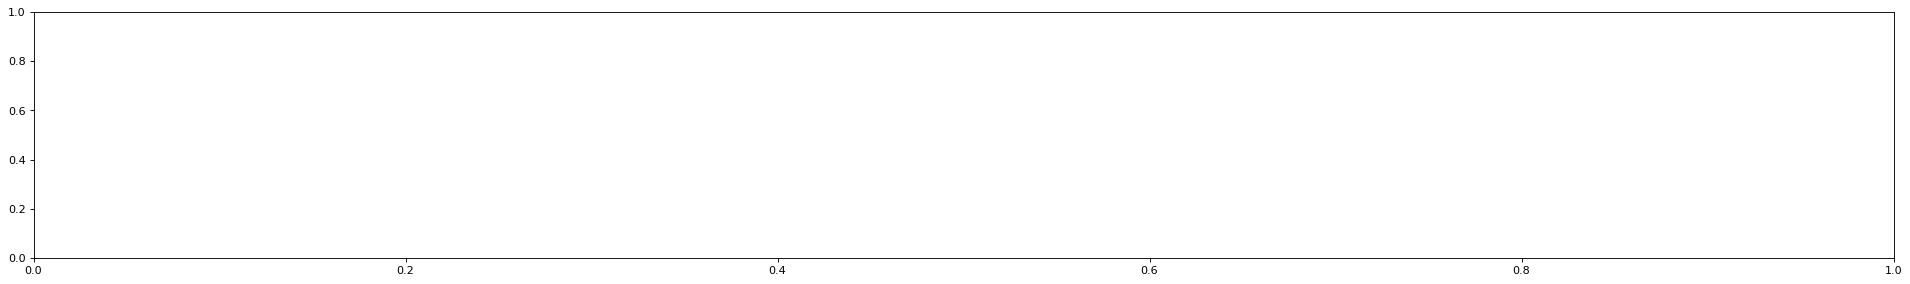

In [133]:
from matplotlib.pyplot import figure

figure(figsize=(30,4), dpi=80)
for i in range(50):
    new_i = i * 12
    plt.plot(range(0+new_i,12+new_i),sample_output[i].detach().cpu().numpy(), color = 'red')
    plt.plot(range(0+new_i,12+new_i),sample_labels[i].cpu().numpy(), color='blue')
plt.show()